# Поставим вопросы нашему датасету:
    #1) Количество школ(tip_ychredgenia)
    #2) Оценим распределение школ по районам
    #3) Оценим количество школ по их подчинению

In [213]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

df = pd.read_excel('1.xlsx')

df.head(3)

,name,adress,okryg,rayon,org_prav_forma,podchinenie,tip_ychregdenia,vid_ychregdenia,telefon,sait,email,X,Y,global_id
0,Государственное бюджетное образовательное учре...,"121309 г. Москва, улица Большая Филевская, дом 9",Западный административный округ,район Филёвский Парк,Государственное,Западное окружное управление образования,Образовательное учреждение дополнительного обр...,Парк,(499) 145-82-73; (499) 145-72-92; (499) 148-05...,dooc-dpfili.mskzapad.ru,dpfili@yandex.ru,"37,504874","55,749395",86887443
1,Государственное бюджетное образовательное учре...,"121500 Набережная улица, 19",Западный административный округ,район Кунцево,Государственное,Западное окружное управление образования,Образовательное учреждение дополнительного обр...,Дом детского творчества,(499) 727-10-85,ddt-rublevo.mskzapad.ru,ddtrublyovo@yandex.ru,"37,351635","55,786937",86887444
2,Государственное бюджетное образовательное учре...,"119607, г.Москва, ул. Раменки, д. 17, корп. 2",Западный административный округ,район Раменки,Государственное,Западное окружное управление образования,Образовательное учреждение дополнительного обр...,Центр,934-47-14,cvr-ramenki.mskzapad.ru,ramenki-cvr@mail.ru,"37,505554","55,693536",86887447


# Оценим размеры DataFrame

In [225]:
df.shape

(116, 14)

# Пробежимся по данным

In [75]:

df.isnull().sum()

name               0
adress             0
okryg              1
rayon              1
org_prav_forma     0
podchinenie        0
tip_ychregdenia    0
vid_ychregdenia    0
telefon            1
sait               4
email              2
X                  0
Y                  0
global_id          0
dtype: int64

In [214]:
df = df.replace(0,"Нет информации")
df.head(3)

,name,adress,okryg,rayon,org_prav_forma,podchinenie,tip_ychregdenia,vid_ychregdenia,telefon,sait,email,X,Y,global_id
0,Государственное бюджетное образовательное учре...,"121309 г. Москва, улица Большая Филевская, дом 9",Западный административный округ,район Филёвский Парк,Государственное,Западное окружное управление образования,Образовательное учреждение дополнительного обр...,Парк,(499) 145-82-73; (499) 145-72-92; (499) 148-05...,dooc-dpfili.mskzapad.ru,dpfili@yandex.ru,"37,504874","55,749395",86887443
1,Государственное бюджетное образовательное учре...,"121500 Набережная улица, 19",Западный административный округ,район Кунцево,Государственное,Западное окружное управление образования,Образовательное учреждение дополнительного обр...,Дом детского творчества,(499) 727-10-85,ddt-rublevo.mskzapad.ru,ddtrublyovo@yandex.ru,"37,351635","55,786937",86887444
2,Государственное бюджетное образовательное учре...,"119607, г.Москва, ул. Раменки, д. 17, корп. 2",Западный административный округ,район Раменки,Государственное,Западное окружное управление образования,Образовательное учреждение дополнительного обр...,Центр,934-47-14,cvr-ramenki.mskzapad.ru,ramenki-cvr@mail.ru,"37,505554","55,693536",86887447


In [100]:
df.isnull().sum()

name               0
adress             0
okryg              0
rayon              0
org_prav_forma     0
podchinenie        0
tip_ychregdenia    0
vid_ychregdenia    0
telefon            0
sait               0
email              0
X                  0
Y                  0
global_id          0
dtype: int64

In [101]:
littlt_table =  pd.pivot_table(df,
                              index= 'org_prav_forma',
                              values = 'vid_ychregdenia',
                              aggfunc = 'count')

littlt_table

,vid_ychregdenia
org_prav_forma,
Государственное,116


<AxesSubplot:ylabel='vid_ychregdenia'>

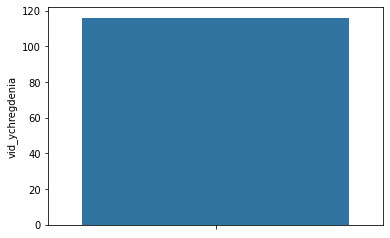

In [102]:
sns.barplot(y = 'vid_ychregdenia', data=littlt_table)

In [222]:
###100% государственного,очень интересно....

###произведем количественную оценку учебных заведений по видам

In [224]:
# отбираем уникальные занчения

unique_uch  = df["vid_ychregdenia"].unique()
unique_uch


array(['Парк', 'Дом детского творчества', 'Центр', 'Дворец',
       'Детско-юношеский центр', 'Центр внешкольной работы', 'Дом',
       'Центр детского творчества', 'Детская школа искусств',
       'Центр развития творчества детей и юношества', 'Станция',
       'Центр дополнительного образование детей'], dtype=object)

In [106]:
### Счиатем количество уникальных значений

count_uch = [sum(df["vid_ychregdenia"] == i) for i in unique_uch]
count_uch

[1, 3, 51, 34, 3, 7, 6, 2, 1, 5, 1, 2]

In [107]:
count_df_uch = pd.DataFrame({"Вид учреждения":unique_uch,
                             "Количество учреждений": count_uch
                            })

count_df_uch

,Вид учреждения,Количество учреждений
0,Парк,1
1,Дом детского творчества,3
2,Центр,51
3,Дворец,34
4,Детско-юношеский центр,3
5,Центр внешкольной работы,7
6,Дом,6
7,Центр детского творчества,2
8,Детская школа искусств,1
9,Центр развития творчества детей и юношества,5


In [108]:
df[df["vid_ychregdenia"] == 'Дворец']

,name,adress,okryg,rayon,org_prav_forma,podchinenie,tip_ychregdenia,vid_ychregdenia,telefon,sait,email,X,Y,global_id
6,Государственное бюджетное образовательное учре...,"101000 город Москва, переулок Огородная слобод...",Центральный административный округ,Басманный район,Государственное,Центральное окружное управление образования,Образовательное учреждение дополнительного обр...,Дворец,(495) 628-08-71; (495) 628-41-51; (495) 621-81...,na-stopani.dop.mskobr.ru,ddstopan@couo.ru,"37,642402","55,765252",86887490
8,Государственное бюджетное образовательное учре...,"119334 г. Москва, ул. Косыгина, д. 17",Юго-Западный административный округ,Гагаринский район,Государственное,Городское подчинение: Управление воспитания и ...,Образовательное учреждение дополнительного обр...,Дворец,137-73-88,mgddut.dop.mskobr.ru,mgddyt@yandex.ru,"37,551942","55,702453",86887586
16,Государственное бюджетное образовательное учре...,"125310, г. Москва, Ангелов переулок, д. 2, кор...",Северо-Западный административный округ,район Митино,Государственное,Северо-Западное окружное управление образования,Образовательное учреждение дополнительного обр...,Дворец,(495) 497-20-00,dtdim.dop.mskobr.ru/,info@dt-ostrova.ru,"37,451403","55,833694",86904032
17,Государственное бюджетное образовательное учре...,"123154, г. Москва, улица Маршала Тухачевского...",Северо-Западный административный округ,район Хорошёво-Мнёвники,Государственное,Северо-Западное окружное управление образования,Образовательное учреждение дополнительного обр...,Дворец,(499) 197-51-23,dtim.dop.mskobr.ru,cdt@mail.ru,"37,479868","55,783891",86904033
25,Государственное бюджетное образовательное учре...,"109263, г.Москва, ул. Шкулева, дом 2",Юго-Восточный административный округ,район Текстильщики,Государственное,Юго-Восточное окружное управление образования,Образовательное учреждение дополнительного обр...,Дворец,(499) 179-65-11,dpgaidar.dop.mskobr.ru,dpgaidar@mail.ru,"37,744747","55,692139",86904158
41,Государственное бюджетное образовательное учре...,"107553,г.Москва, ул.Большая Черкизовская, дом 15",Восточный административный округ,район Преображенское,Государственное,Восточное окружное управление образования,Образовательное учреждение дополнительного обр...,Дворец,(499) 161-15-06; (499) 161-14-56,dtdimvouo.dop.mskobr.ru,dtdimvouo@gmail.com,"37,733146","55,802542",86911370
45,Государственное бюджетное образовательное учре...,"124575, г. Москва, Зеленоград, площадь Колумба...",Зеленоградский административный округ,район Старое Крюково,Государственное,Зеленоградское окружное управление образования,Образовательное учреждение дополнительного обр...,Дворец,(499) 731-14-61,dvtdim.dop.mskobr.ru,dvtv@zou.ru,"37,189304","55,987812",86914869
48,Государственное бюджетное образовательное учре...,"111123, г.Москва, Владимирская 1-я улица, дом 20",Восточный административный округ,район Перово,Государственное,Восточное окружное управление образования,Образовательное учреждение дополнительного обр...,Дворец,(499) 721-69-91,dtdumvosto.dop.mskobr.ru,dtdumvosto4ny@mail.ru,"37,775424","55,754114",86914893
52,Государственное бюджетное образовательное учре...,"109651, г. Москва, ул. Подольская, дом 5",Юго-Восточный административный округ,район Марьино,Государственное,Юго-Восточное окружное управление образования,Образовательное учреждение дополнительного обр...,Дворец,(499) 356-37-01,marino.dop.mskobr.ru,public@mgdmar.ru,"37,714504","55,653752",86930413
60,Государственное бюджетное образовательное учре...,"125047 г.Москва, ул. Александра Невского, д. 4...",Центральный административный округ,Тверской район,Государственное,Центральное окружное управление образования,Образовательное учреждение дополнительного обр...,Дворец,250-29-09,cdt.dop.mskobr.ru,dtnamiussah@mail.ru,"37,620004","55,733211",86930924


<AxesSubplot:xlabel='Количество учреждений', ylabel='Вид учреждения'>

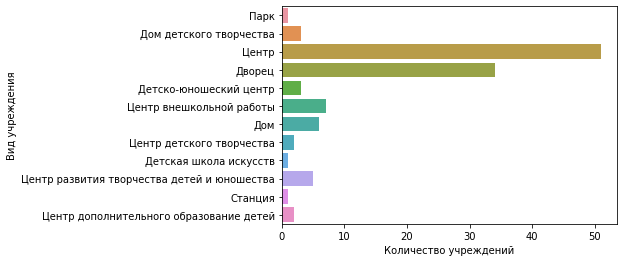

In [109]:
sns.barplot(x = 'Количество учреждений',y = 'Вид учреждения', data= count_df_uch)

In [110]:
###Исходя из данного графика, можно сделать вывод, что в 2012 самый распространенный вид учреждения Центр

In [111]:
unique_ground = df.rayon.unique()
unique_ground


array(['район Филёвский Парк', 'район Кунцево', 'район Раменки',
       'район Очаково-Матвеевское', 'район Тропарёво-Никулино',
       'район Солнцево', 'Басманный район', 'район Чертаново Южное',
       'Гагаринский район', 'район Зюзино', 'район Лианозово',
       'район Строгино', 'район Северное Тушино', 'район Митино',
       'район Хорошёво-Мнёвники', 'район Южное Тушино', 'Мещанский район',
       'Пресненский район', 'район Хамовники', 'Тверской район',
       'Академический район', 'район Текстильщики', 'район Котловка',
       'район Северное Медведково', 'Бабушкинский район',
       'район Отрадное', 'район Марьина Роща', 'район Бибирево',
       'район Южное Медведково', 'район Свиблово', 'Ярославский район',
       'район Северный', 'Бутырский район', 'Останкинский район',
       'район Преображенское', 'район Старое Крюково', 'район Крюково',
       'район Силино', 'район Ивановское', 'район Перово',
       'район Северное Измайлово', 'Донской район', 'район Марьино',
  

In [216]:
#отбор уникальных значений
unique_ground_count = [sum(df["rayon"] == i) for i in unique_ground]

In [218]:
count_df_ray = pd.DataFrame({"Район":unique_ground,
                            "Количество школ в данном районе": unique_ground_count
                            })

count_df_ray.head(5)

,Район,Количество школ в данном районе
0,район Филёвский Парк,2
1,район Кунцево,1
2,район Раменки,3
3,район Очаково-Матвеевское,1
4,район Тропарёво-Никулино,2


<AxesSubplot:xlabel='Количество школ в данном районе', ylabel='Район'>

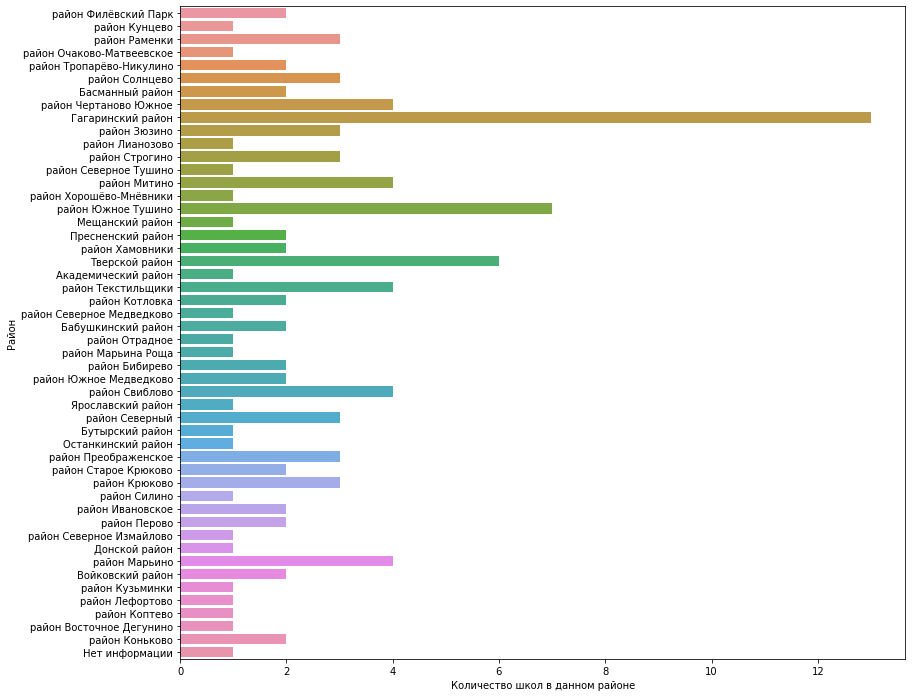

In [116]:
plt.figure(figsize=(13,12))
sns.barplot(x = 'Количество школ в данном районе',y = 'Район', data= count_df_ray)

In [ ]:
### Анализирую данный график можно сделать вывод,что больше всего школ расположено в Гагаринском районе

In [118]:
df.head()

,name,adress,okryg,rayon,org_prav_forma,podchinenie,tip_ychregdenia,vid_ychregdenia,telefon,sait,email,X,Y,global_id
0,Государственное бюджетное образовательное учре...,"121309 г. Москва, улица Большая Филевская, дом 9",Западный административный округ,район Филёвский Парк,Государственное,Западное окружное управление образования,Образовательное учреждение дополнительного обр...,Парк,(499) 145-82-73; (499) 145-72-92; (499) 148-05...,dooc-dpfili.mskzapad.ru,dpfili@yandex.ru,"37,504874","55,749395",86887443
1,Государственное бюджетное образовательное учре...,"121500 Набережная улица, 19",Западный административный округ,район Кунцево,Государственное,Западное окружное управление образования,Образовательное учреждение дополнительного обр...,Дом детского творчества,(499) 727-10-85,ddt-rublevo.mskzapad.ru,ddtrublyovo@yandex.ru,"37,351635","55,786937",86887444
2,Государственное бюджетное образовательное учре...,"119607, г.Москва, ул. Раменки, д. 17, корп. 2",Западный административный округ,район Раменки,Государственное,Западное окружное управление образования,Образовательное учреждение дополнительного обр...,Центр,934-47-14,cvr-ramenki.mskzapad.ru,ramenki-cvr@mail.ru,"37,505554","55,693536",86887447
3,Государственное бюджетное образовательное учре...,"119501, г.Москва, ул. Веерная, д. 38, корп. 1",Западный административный округ,район Очаково-Матвеевское,Государственное,Западное окружное управление образования,Образовательное учреждение дополнительного обр...,Центр,442-36-61,cdt-matveevskoe.mskzapad.ru,cdt-matveevskoe@mail.ru,"37,4818","55,713181",86887450
4,Государственное бюджетное образовательное учре...,"119571 Москва, ул. Двадцати шести Бакинских ко...",Западный административный округ,район Тропарёво-Никулино,Государственное,Западное окружное управление образования,Образовательное учреждение дополнительного обр...,Центр,434-31-04,cdt-sozvezdie.mskzapad.ru,cdtsozvezdie@mail.ru,"37,487862","55,657128",86887452


In [219]:
df_group_1 = df.groupby(by = ['vid_ychregdenia', 'rayon'],as_index=False).aggregate({'name':'count'}).rename(columns = {'name':'count_vid_ychregdenia'})



df_group_1.head(5)

### Эта группировка была произведена для проверки

,vid_ychregdenia,rayon,count_vid_ychregdenia
0,Дворец,Басманный район,1
1,Дворец,Гагаринский район,13
2,Дворец,Тверской район,3
3,Дворец,район Марьино,4
4,Дворец,район Митино,4


<AxesSubplot:xlabel='Count', ylabel='rayon'>

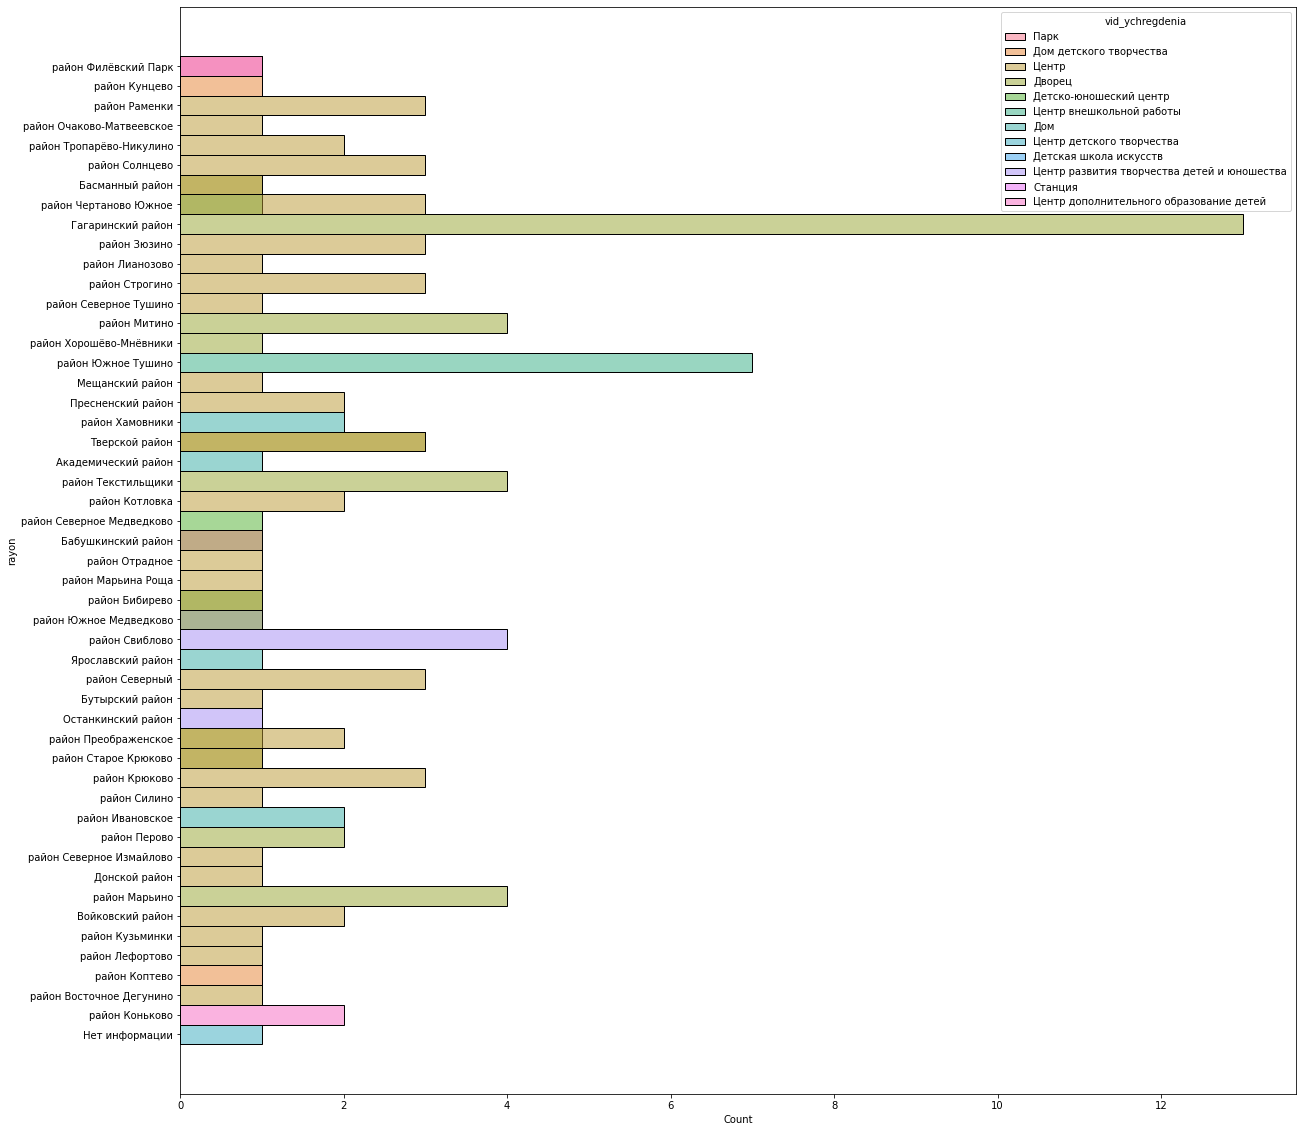

In [191]:
plt.figure(figsize=(20,20))
sns.histplot(y = 'rayon',hue='vid_ychregdenia',data=df)

In [ ]:
### Больше всего школ находится в Гагаринском раойне и их вид - дворец.

In [195]:
df["okryg"].unique()

array(['Западный административный округ',
       'Центральный административный округ',
       'Южный административный округ',
       'Юго-Западный административный округ',
       'Северо-Восточный административный округ',
       'Северо-Западный административный округ',
       'Юго-Восточный административный округ',
       'Восточный административный округ',
       'Зеленоградский административный округ',
       'Северный административный округ', 'Нет информации'], dtype=object)

<AxesSubplot:xlabel='Count', ylabel='okryg'>

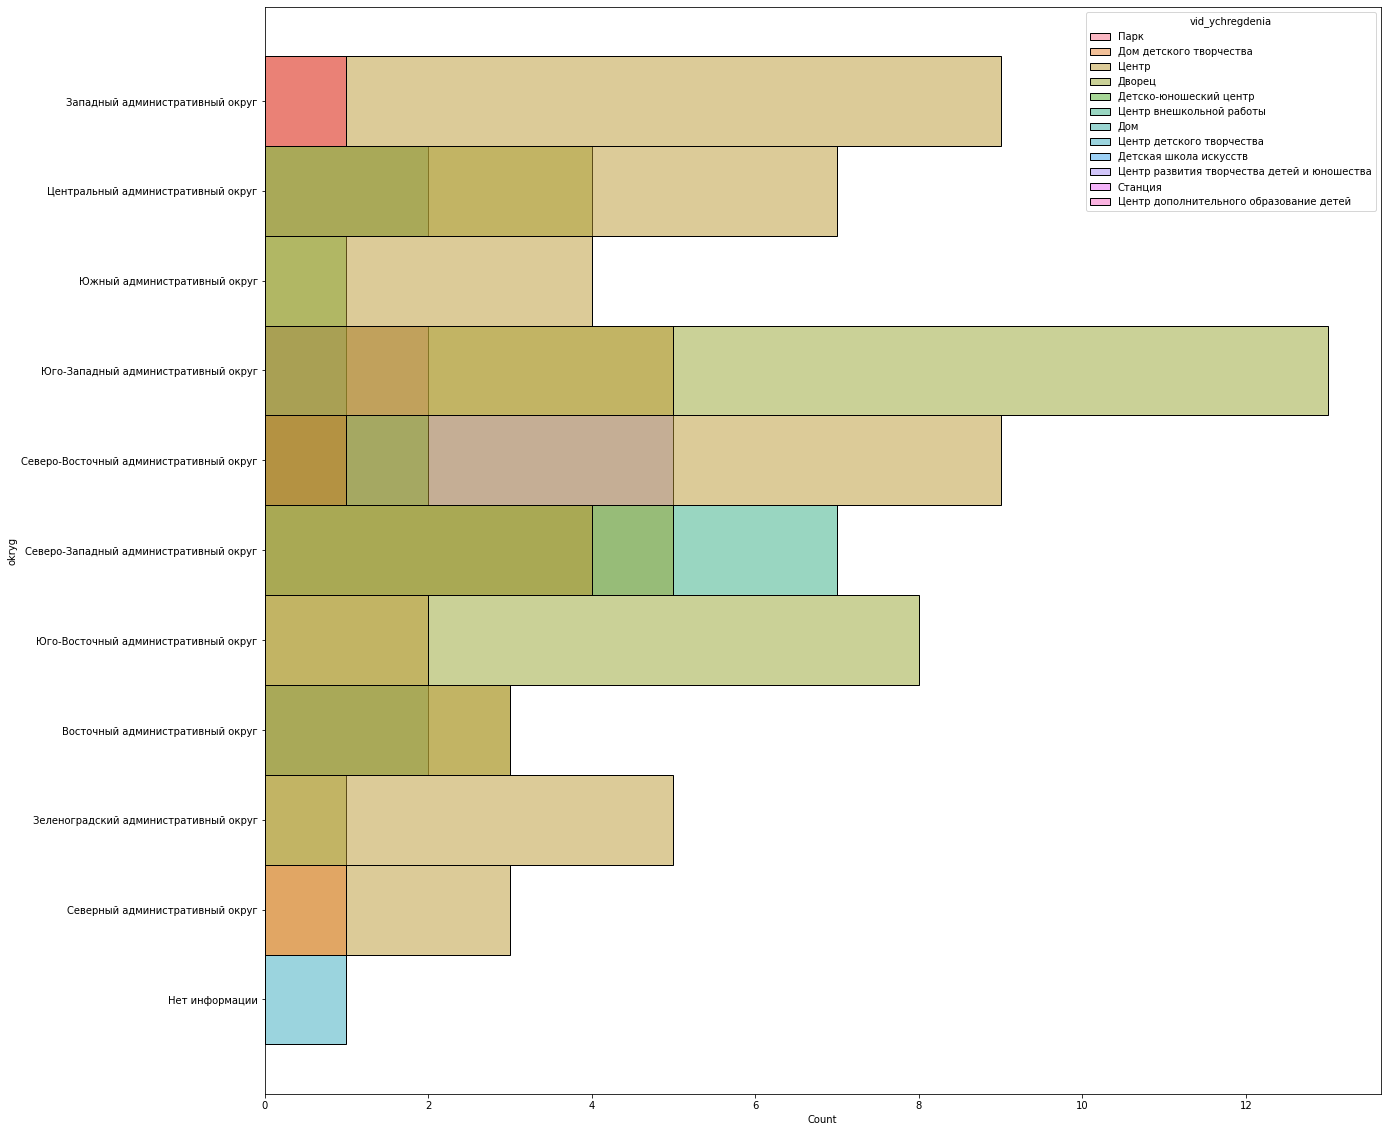

In [196]:
plt.figure(figsize=(20,20))
sns.histplot(y = 'okryg',hue='vid_ychregdenia',data=df)

In [202]:
df_group_2 = df.groupby(by = ['okryg'],as_index=False).aggregate({'vid_ychregdenia':'count'}).rename(columns = {'vid_ychregdenia':'count_vid_ychregdenia'})

df_group_2

,okryg,count_vid_ychregdenia
0,Восточный административный округ,8
1,Западный административный округ,12
2,Зеленоградский административный округ,6
3,Нет информации,1
4,Северный административный округ,4
5,Северо-Восточный административный округ,20
6,Северо-Западный административный округ,16
7,Центральный административный округ,13
8,Юго-Восточный административный округ,10
9,Юго-Западный административный округ,21


<AxesSubplot:xlabel='count', ylabel='okryg'>

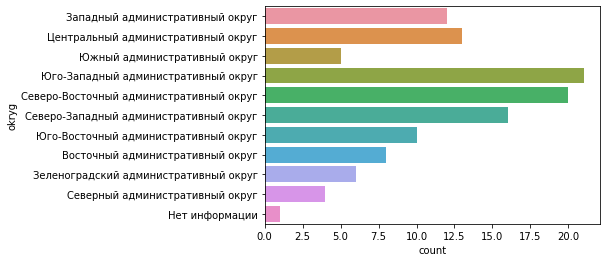

In [209]:
sns.countplot(y = 'okryg',data = df)

###Анализирую данный график можно сделать вывод, что Юго-Западный округ является самым большим

#### В результате данной работы были выполнены все пункты из списка, аномалий в данных замечено не было
